# Iris Species Detection

This project aims to predict the species of the iris plant based on the plant's attributes

## Steps

* Libraries Importing 
* Data Importing 
* Data Wrangling
* Data Visualization
* Model Creation
* Model parameters tuning
* Prediction

# Libraries Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Data Importing

In [2]:
iris_df = pd.read_csv("iris.csv")

In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Wrangling

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df.duplicated().sum()

3

No missing values but 3 duplicated rows

In [8]:
iris_df = iris_df.drop_duplicates()

In [10]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Data Visualization

<AxesSubplot:xlabel='species', ylabel='count'>

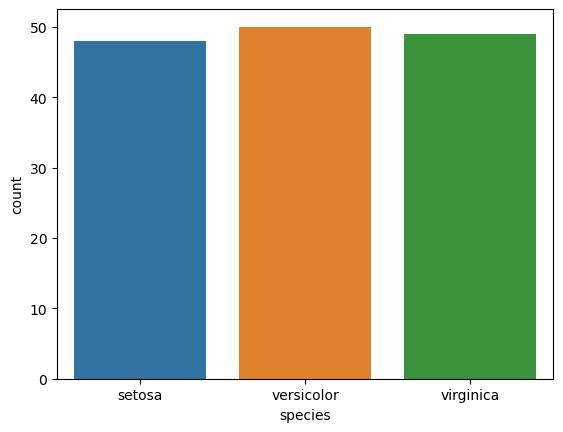

In [11]:
sns.countplot(data=iris_df, x="species")

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

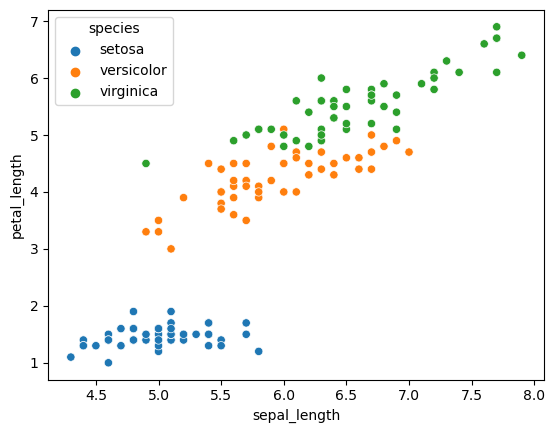

In [13]:
sns.scatterplot(data=iris_df, x="sepal_length", y="petal_length", hue="species")

This shows a clear classification of the different species based on petal and sepal lengths with setosa having lower lengths and virginica having higher lengths.

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

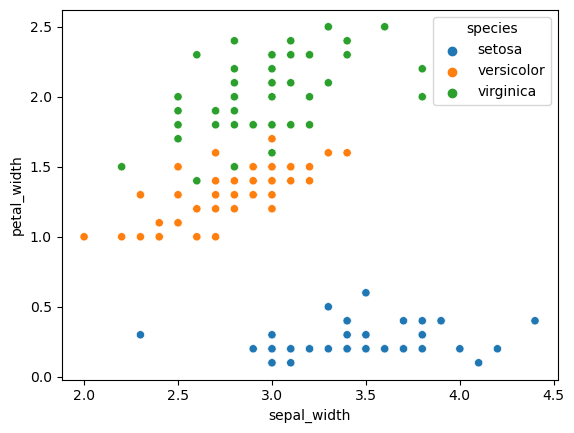

In [14]:
sns.scatterplot(data=iris_df, x="sepal_width", y="petal_width", hue="species")

There is also clear distinctions between the different species based on petal and sepal widths as seen.

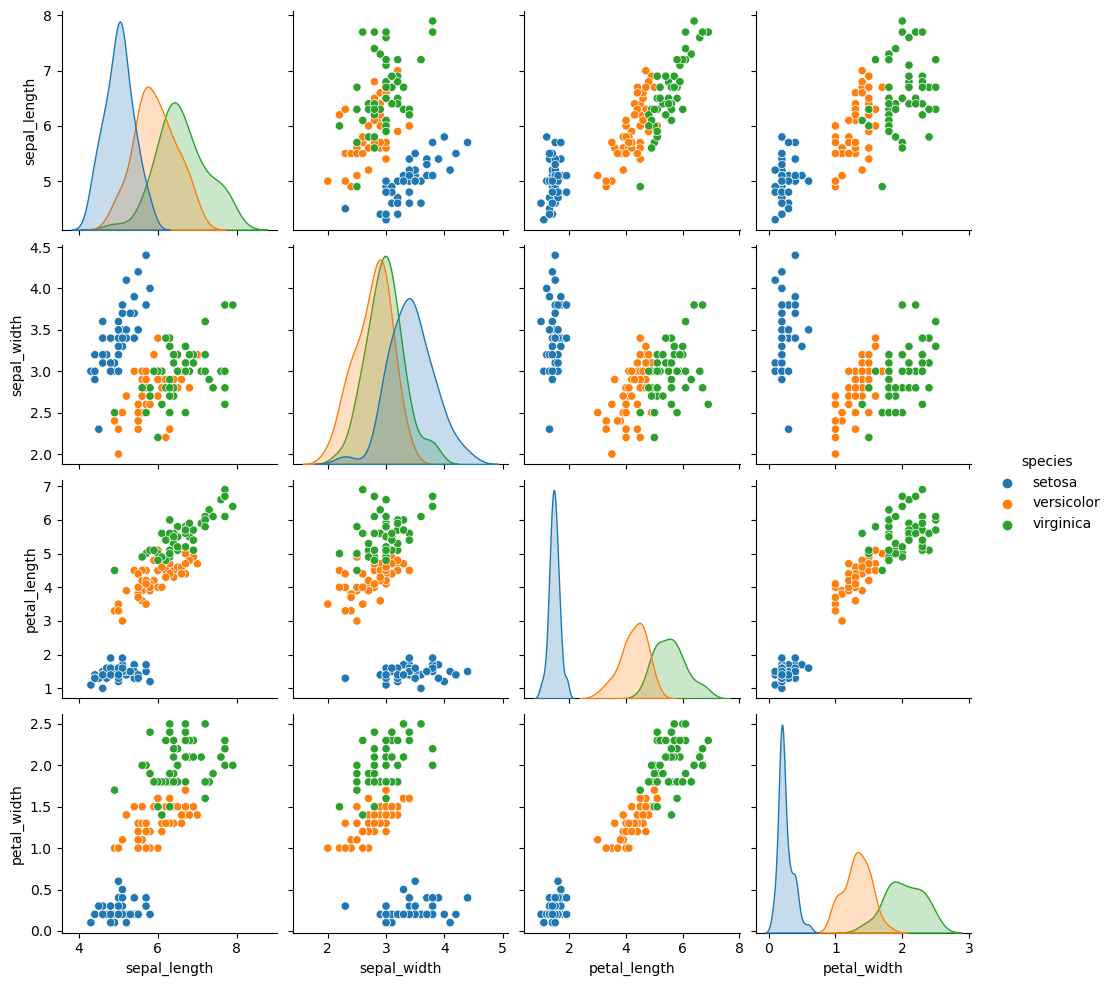

In [15]:
sns.pairplot(data=iris_df, hue="species")

It can be seen that each of the species seems to have a distinct mean based on each of the variable when looking at the density plot except the sepal width. This can be a signal that the sepal width is not a determining factor to differentiating between the different species

<AxesSubplot:>

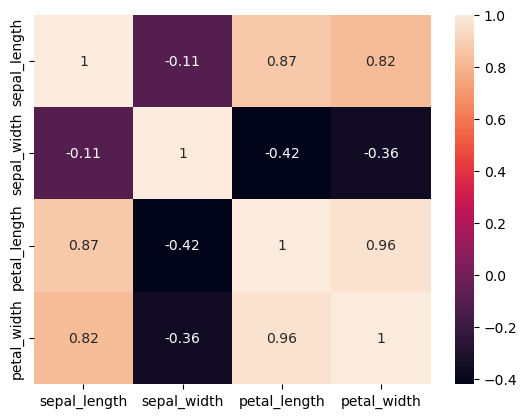

In [16]:
sns.heatmap(data=iris_df.corr(), annot=True)

Normally, the highly correlated variables would pose a problem especially with models that use regression. But in this case, the use of the proposed algorithms would eliminate such an issue.

# Model Creation

In [17]:
X = iris_df.drop("species", axis=1)
y = iris_df["species"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [21]:
knn_model = KNeighborsClassifier()
svc_model = SVC()
dtc_model = DecisionTreeClassifier()

In [22]:
knn_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
print("The accuracy of the KNN model is", accuracy_score(y_test, knn_model.predict(X_test)))
print("The accuracy of the SVC model is", accuracy_score(y_test, svc_model.predict(X_test)))
print("The accuracy of the DTC model is", accuracy_score(y_test, dtc_model.predict(X_test)))

The accuracy of the KNN model is 0.972972972972973
The accuracy of the SVC model is 1.0
The accuracy of the DTC model is 0.9459459459459459


C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


With no tuning we are getting a near perfect predict for most of the classes. This might be due to the small size of the dataset though. Performing some tuning on the K Nearest Neighbours and the Decision Tree models we have below;

# Model Parameters Tuning

In [24]:
accuracy = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, knn_pred))

C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

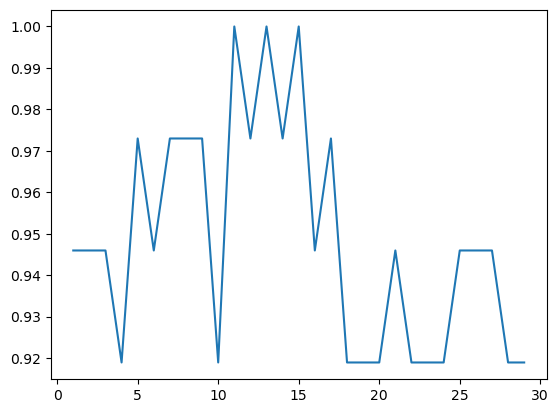

In [25]:
plt.plot(np.arange(1,30), accuracy)

For the KNN model, we observe a perfect model stabilizing at 13

Due to the low amount of variables, there is very little that can be done in the case of tuning the decision tree classifier and as such it will be left the way it is.

# Prediction

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=13)

In [71]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [72]:
knn_pred = knn_model.predict(X_test)
svc_pred = svc_model.predict(X_test)
dtc_pred = dtc_model.predict(X_test)

C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [73]:
print("For the KNN model, we have\n\n",classification_report(y_test,knn_pred))

For the KNN model, we have

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [74]:
print("For the SVC model, we have\n\n",classification_report(y_test,svc_pred))

For the SVC model, we have

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [75]:
print("For the DTC model, we have\n\n",classification_report(y_test,dtc_pred))

For the DTC model, we have

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      1.00      0.94        16
   virginica       1.00      0.82      0.90        11

    accuracy                           0.95        37
   macro avg       0.96      0.94      0.95        37
weighted avg       0.95      0.95      0.94        37



It can be seen that of the bat, the Support Vector Machine model performed very well with little effort. Again, this might have been because of the small dataset and such a success should not be generalized carelessly to other applications.